# Libraries

In [2]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Introduction

We use the following Newtonian differential equations to model the movement of the bodies:

\begin{equation}
 \ddot{x}_i(t)= G \cdot \sum_{j\neq i}{\frac{m_j}{||x_j(t)-x_i(t)||^3}}(x_j(t)-x_i(t))
\end{equation}

# 2 Bodies implementation

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute acceleration (force per unit mass)
def compute_acceleration(x1, x2, m, G=1.0):
    r = x2 - x1
    r_norm = np.linalg.norm(r)
    return G * m * r / (r_norm**3)

def rk4_step(x, v, m, x_other, m_other, dt):
    k1v = dt * compute_acceleration(x, x_other, m_other)
    k1x = dt * v
    k2v = dt * compute_acceleration(x + 0.5 * k1x, x_other, m_other)
    k2x = dt * (v + 0.5 * k1v)
    k3v = dt * compute_acceleration(x + 0.5 * k2x, x_other, m_other)
    k3x = dt * (v + 0.5 * k2v)
    k4v = dt * compute_acceleration(x + k3x, x_other, m_other)
    k4x = dt * (v + k3v)

    v_new = v + (1/6) * (k1v + 2*k2v + 2*k3v + k4v)
    x_new = x + (1/6) * (k1x + 2*k2x + 2*k3x + k4x)

    return x_new, v_new

# Simulation using RK4 method
def simulate_two_body_system(t0, tf, h, x1_0, x2_0, v1_0, v2_0, m1, m2):
    timesteps = int((tf - t0) / h) + 1
    t = np.linspace(t0, tf, timesteps)

    # Arrays to store positions
    x1 = np.zeros((timesteps, 2))
    x2 = np.zeros((timesteps, 2))
    x1[0] = x1_0
    x2[0] = x2_0

    # RK4 integration loop
    for i in range(1, timesteps):
        x1[i], v1 = rk4_step(x=x1[i-1], v=v1_0,
                             x_other=x2[i-1], m=m1, m_other=m2,
                             dt=h)
        x2[i], v2 = rk4_step(x=x2[i-1], v=v2_0,
                             x_other=x1[i-1], m=m2, m_other=m1,
                             dt=h)
        v1_0 = v1  # Update velocity for body 1
        v2_0 = v2  # Update velocity for body 2

    return x1, x2, t

def run_simulation(
    t0, tf,
    h,
    x1_0, x2_0,
    v1_0, v2_0,
    m1, m2
):
  x1_traj, x2_traj, time = simulate_two_body_system(
      t0, tf,
      h,
      x1_0, x2_0,
      v1_0, v2_0,
      m1, m2
  )
  plot_simulation(x1_traj, x2_traj)

  return x1_traj, x2_traj, time

def plot_simulation(x1_traj, x2_traj):
  # Plotting
  plt.figure(figsize=(8, 6))
  plt.plot(x1_traj[:, 0], x1_traj[:, 1], label='Body 1')
  plt.plot(x2_traj[:, 0], x2_traj[:, 1], label='Body 2')
  plt.title('Two-Body Orbit Simulation using RK4')
  plt.plot(x1_traj[0, 0], x1_traj[0, 1], marker='o', linestyle='None',
          label = 'body 1 start',
          #  label = f'body 1 start \n$x(0)=$' + f'{tuple(x1_0)}, ' + r'$\dot{x}(0)=$' + f'{tuple(v1_0)}',
          color='black')
  plt.plot(x2_traj[0, 0], x2_traj[0, 1], marker='o', linestyle='None',
          label = 'body 2 start',
          #  label = f'body 2 start \n$x(0)=$' + f'{tuple(x2_0)}, ' + r'$\dot{x}(0)=$' + f'{tuple(v2_0)}',
          color='red')

  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend(bbox_to_anchor=(1.05, 0.9))
  plt.grid(True)
  plt.show()



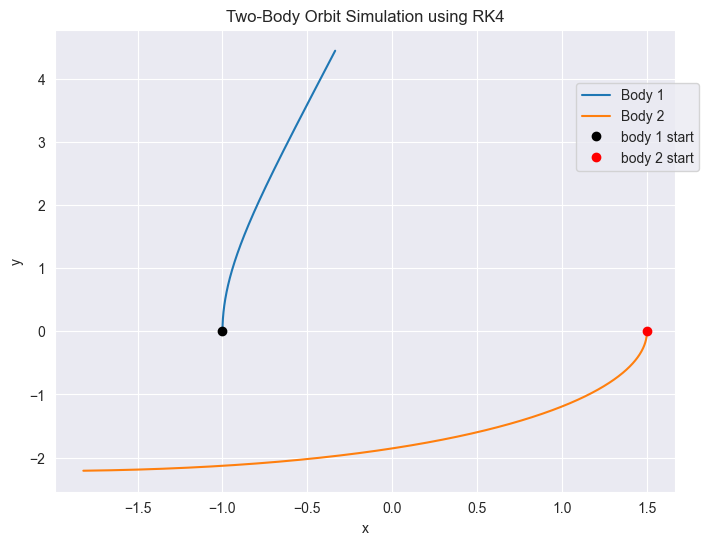

In [4]:
_ = run_simulation(
    t0=0, tf=10,
    h=0.01,

    x1_0=np.array([-1.0, 0.0]),
    v1_0=np.array([0.0, 0.5]) ,

    x2_0=np.array([1.5, 0.0]),
    v2_0=np.array([0.0, -0.5]),
    m1=1.0,
    m2=1/5
)

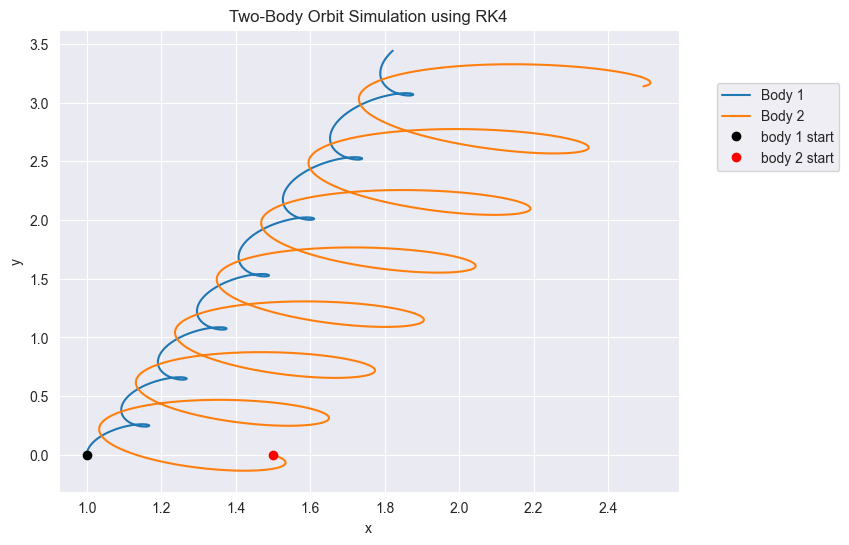

In [5]:
_ = run_simulation(
    t0=0, tf=10,
    h=0.001,

    x1_0=np.array([1.0, 0.0]),
    v1_0=np.array([0.0, 0.5]) ,

    x2_0=np.array([1.5, 0.0]),
    v2_0=np.array([0.5, -0.5]),
    m1=1.0,
    m2=1/5
)

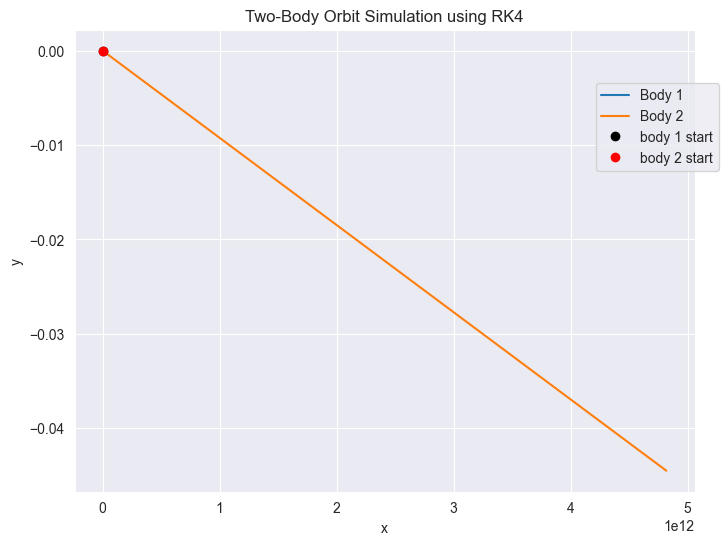

In [6]:
# based on other implementation
# 1: sun
# 2: earth

_ = run_simulation(
    t0=0, tf=10,
    h=0.001,

    x1_0=np.array([0.0, 0.0]),
    v1_0=np.array([0.0, 0.0]) ,

    x2_0=np.array([1.47e8, 0]),
    v2_0=np.array([0.0, 0.0000897]),
    m1=2e30,
    m2=5.976e24
)